In [63]:
import numpy as np                  # Arrays
import random                       # Random number generation 
import matplotlib.pyplot as plt     # General visualization
import networkx as nx               # Graph visualization 
from libpysal.weights import lat2W  #  Grid adjacency matrix creator

from tqdm import tqdm
import itertools

all_moves = list(itertools.product([-1,0,1], repeat=2))

print(all_moves)


[(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1)]


We model the floor plans of warehouses as graphs; nodes representing locations where stock is shelved and edges indicate an uninterrupted path between two locations.

A general process for making adjacency list representations of such graphs is required.

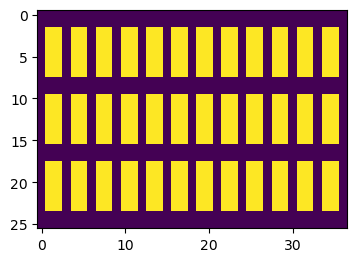

NetworkXError: Node '[1 1]' has no position.

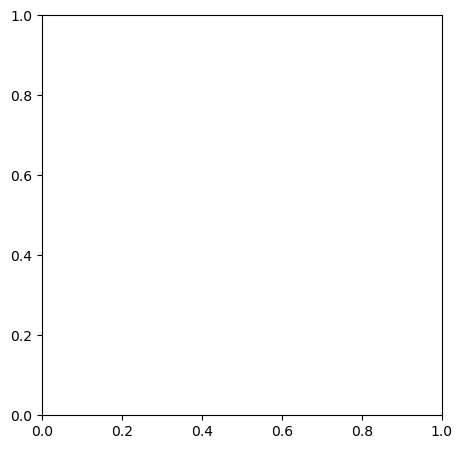

In [146]:
SHELF_SIZE = np.array([6, 2])
GAP_SIZE = np.array([2, 1])
NUM_SHELVES = np.array([3, 12])

GRID_SIZE = NUM_SHELVES*(GAP_SIZE + SHELF_SIZE) + GAP_SIZE

grid = np.zeros(GRID_SIZE)

for index, values in np.ndenumerate(grid):
    if np.all(((index) % (GAP_SIZE + SHELF_SIZE) >= GAP_SIZE)):
        grid[index] = 1


graph = nx.Graph()
for index, values in np.ndenumerate(grid):
    if values != 1:
        graph.add_node(str(index), pos = np.flip(index))

moves =  [np.array(move) for move in itertools.product([-1,0,1], repeat=2)]
for index, values in np.ndenumerate(grid):
    if values != 1:
        for move in moves:
            neighbour = move + index
            if (np.all(neighbour > 0)) and (np.all(GRID_SIZE-neighbour > 0)):
                if grid[neighbour[0], neighbour[1]] == 0.0:
                    graph.add_edge(str(index), str(neighbour))

plt.figure(figsize = (4, 4))
plt.imshow(grid)
plt.show()

plt.figure(figsize = (4, 4))
pos = nx.get_node_attributes(graph, 'pos')
nx.draw(graph, pos = pos, node_size = 10)
plt.show()

